In [1]:
import pandas as pd
from dateutil import parser
import duckdb as db
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, dcc, html, Input, Output
from base64 import b64encode
import io

In [2]:
data = pd.read_csv('sample_social_media_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3000 non-null   int64 
 1   platform   3000 non-null   object
 2   username   3000 non-null   object
 3   post_date  3000 non-null   object
 4   content    3000 non-null   object
 5   likes      3000 non-null   int64 
 6   comments   3000 non-null   int64 
 7   shares     3000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 187.6+ KB


In [3]:
data["post_date"] = data["post_date"].map(parser.parse)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3000 non-null   int64         
 1   platform   3000 non-null   object        
 2   username   3000 non-null   object        
 3   post_date  3000 non-null   datetime64[ns]
 4   content    3000 non-null   object        
 5   likes      3000 non-null   int64         
 6   comments   3000 non-null   int64         
 7   shares     3000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 187.6+ KB


In [4]:
data

,id,platform,username,post_date,content,likes,comments,shares
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9
...,...,...,...,...,...,...,...,...
2995,2996,Twitter,walkerthomas,2023-10-31 05:45:03,Argue fall from degree.,82,38,20
2996,2997,Facebook,shieldsnicholas,2023-09-01 23:45:03,Bank effort return glass number foot.,245,14,19
2997,2998,Twitter,christinasaunders,2023-09-04 00:45:03,Lead a with physical south arm crime.,146,38,23
2998,2999,Instagram,destinyharris,2023-11-08 19:45:03,Consumer especially support decision quality c...,150,6,5


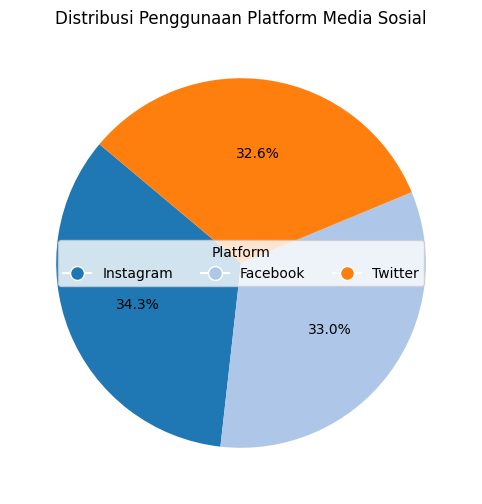

In [5]:
values = data['platform'].value_counts().values
index = data['platform'].value_counts().index
colors = plt.cm.tab20.colors[:len(values)]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Penggunaan Platform Media Sosial')
dummy_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, 
                             markerfacecolor=color) for color in colors]
plt.legend(dummy_handles, index, title='Platform', loc='center', ncol=3)
plt.show()

In [6]:
def query(sql_query:str) -> pd.DataFrame:
    return db.sql(sql_query).df()

Perkembangan User Tertentu di Beberapa Bulan Terakhir

In [7]:
#get data 6 bulan terakhir
a = query('''SELECT * FROM data
        WHERE post_date >= ( 
            SELECT MAX(post_date) - INTERVAL '6 months'
            FROM data )
        ORDER BY MONTH(post_date), DAY(post_date)''')
a

,id,platform,username,post_date,content,likes,comments,shares
0,328,Twitter,nealtom,2023-06-04 16:45:03,Approach charge raise or.,157,5,27
1,738,Facebook,michelemiller,2023-06-04 10:45:03,Prove second prepare thus fire pattern news.,278,2,2
2,767,Twitter,schmittlindsay,2023-06-04 12:45:03,Why address with culture rather stay.,127,40,24
3,1233,Twitter,jholmes,2023-06-04 20:45:03,Small answer run despite age yes media.,183,32,17
4,1444,Twitter,nsmith,2023-06-04 09:45:03,Capital school road under report.,193,1,4
...,...,...,...,...,...,...,...,...
1511,2879,Facebook,hesskevin,2023-12-02 00:45:03,Expert indeed turn lose benefit member.,224,8,11
1512,45,Instagram,ioneill,2023-12-03 00:45:03,Determine sort huge fly throw measure both.,202,40,17
1513,516,Twitter,zreid,2023-12-03 13:45:03,Smile they example growth.,292,11,13
1514,1775,Instagram,mossalexa,2023-12-03 12:45:03,War more government technology against fill.,232,30,6


In [8]:
#cek duplikat user
a[['platform', 'username']].value_counts()

platform   username      
Facebook   kingjose          2
Twitter    williamsdaniel    2
           michael62         2
Instagram  youngvanessa      1
           zsmith            1
                            ..
           adavenport        1
           adamturner        1
           adamsdanielle     1
           adamgreen         1
Twitter    ztaylor           1
Name: count, Length: 1513, dtype: int64

In [9]:
#get data user yang melakukan post >1
b = query("""SELECT *
        FROM a
        WHERE username IN (
            SELECT username,
            FROM a
            GROUP BY username, platform
            HAVING COUNT(username) > 1)
        ORDER BY username, platform""")
b        

,id,platform,username,post_date,content,likes,comments,shares
0,2143,Facebook,kingjose,2023-06-09 01:45:03,Outside meet name force economy center my radio.,154,15,21
1,401,Facebook,kingjose,2023-07-23 08:45:03,Believe she PM reveal up reality.,195,47,16
2,2521,Twitter,michael62,2023-07-31 15:45:03,Set theory serious network talk.,172,39,6
3,2432,Twitter,michael62,2023-09-14 09:45:03,Those entire you while understand specific.,150,18,24
4,9,Twitter,williamsdaniel,2023-09-10 02:45:03,If entire pay there government effect.,277,49,12
5,941,Twitter,williamsdaniel,2023-10-14 16:45:03,Suddenly who cause face high.,17,47,29


In [10]:
grouped = b.groupby(['post_date', 'platform', 'username']).sum().reset_index()

grouped['total'] = grouped[['likes', 'comments', 'shares']].sum(axis=1)
grouped['post_date_platform'] = grouped['post_date'].dt.strftime('%Y-%m-%d') + ', ' + grouped['platform']
grouped['date_only'] = grouped['post_date'].dt.strftime('%Y-%m-%d')

melted = pd.melt(grouped, id_vars=['post_date_platform', 'date_only', 'platform', 'total', 'username'], value_vars=['likes', 'comments', 'shares'], var_name='type', value_name='count')

fig = px.bar(
    melted,
    x='post_date_platform',
    y='count',
    color='username',
    barmode='stack',
    hover_name='total',
    title='Perkembangan User 6 Bulan Terakhir')

fig.update_traces(
    customdata=['Likes'] * 2 + ['Comments'] * 2 + ['Shares'] * 2,
    hovertemplate="<br><b>User:</b> %{fullData.name}"
                  "<br><b>Total:</b> %{hovertext}"
                  "<br><b>Type:</b> %{customdata}"
                  "<br><b>Count:</b> %{y}")

fig.update_layout(
    xaxis_title='Post Date, Platform',
    yaxis_title='Jumlah',
    legend_title='User')
fig.write_html("g_2.html")
fig.show()

In [11]:
def grafik_1(title:str, xlabel:str, ylabel:str):
    for index, row in b.iterrows():
        plt.bar(row['post_date'].strftime('%Y-%m-%d') + ' - ' + row['platform'], row[title], color=user_color_map[row['username']])
    plt.title(title.capitalize())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    handles = [plt.Rectangle((0,0),1,1, color=user_color_map[user]) for user in user_color_map]
    plt.legend(handles, user_color_map.keys(), title='Username', loc='upper right')
    #plt.grid(axis='y')

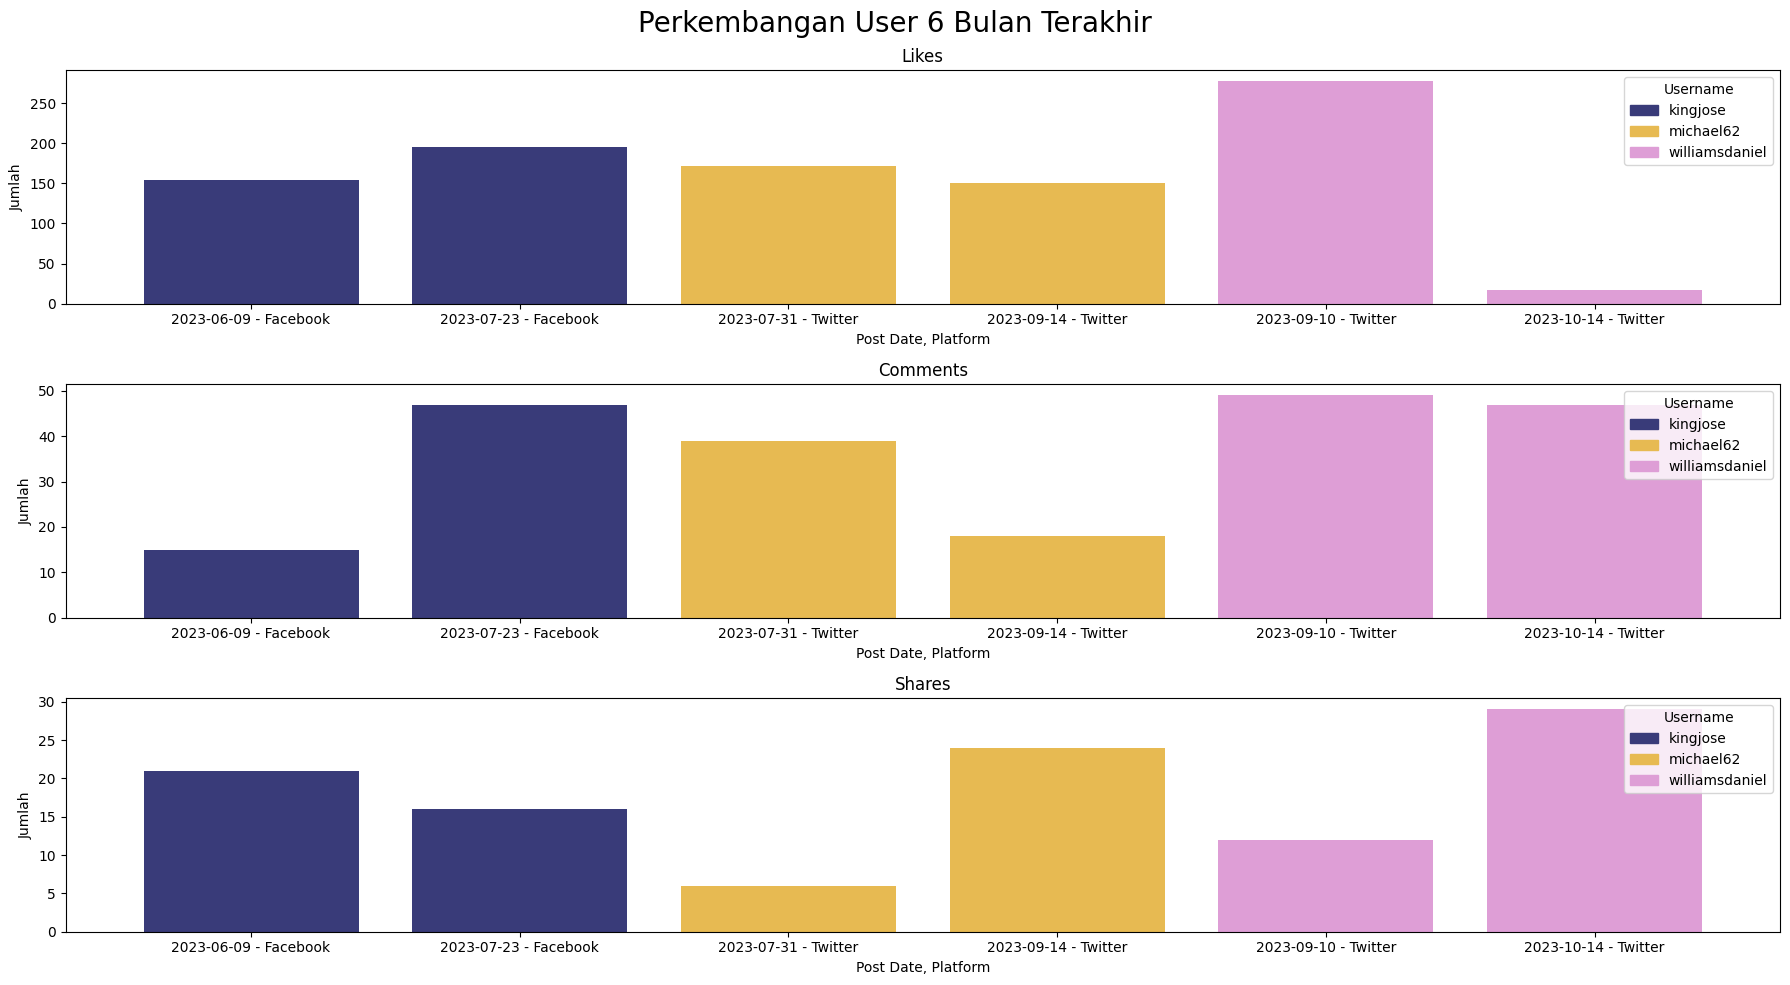

In [12]:
cmap = plt.get_cmap('tab20b', len(b['username'].unique()))

user_color_map = {user: cmap(i) for i, user in enumerate(b['username'].unique())}

plt.figure(figsize=(18, 10))

plt.subplot(3,1,1) 
grafik_1('likes', 'Post Date, Platform', 'Jumlah')

plt.subplot(3,1,2) 
grafik_1('comments', 'Post Date, Platform', 'Jumlah')

plt.subplot(3,1,3) 
grafik_1('shares', 'Post Date, Platform', 'Jumlah')

plt.suptitle('Perkembangan User 6 Bulan Terakhir', fontsize=20)
plt.tight_layout()
plt.show()

Kumpulan Aktivitas User dalam Sehari -> untuk mengetahui pola berdasarkan jam dalam sehari

In [13]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in data.iloc[:, 5:]])

c = query(f'''SELECT HOUR(post_date) AS Hour, {sum_col}, 
            COUNT(username) AS User, COUNT(content) AS Content, platform FROM data 
            GROUP BY platform, HOUR(post_date)
            ORDER BY HOUR(post_date)''')
c

,Hour,likes,comments,shares,User,Content,platform
0,0,6295.0,874.0,730.0,38,38,Twitter
1,0,7672.0,1377.0,718.0,47,47,Instagram
2,0,4805.0,911.0,551.0,36,36,Facebook
3,1,5279.0,1023.0,632.0,40,40,Instagram
4,1,7466.0,1277.0,735.0,47,47,Facebook
...,...,...,...,...,...,...,...
67,22,7636.0,1246.0,799.0,53,53,Instagram
68,22,7755.0,1171.0,793.0,49,49,Facebook
69,23,6379.0,1008.0,610.0,41,41,Twitter
70,23,5922.0,1008.0,566.0,42,42,Facebook


In [14]:
def grafik_2(title:str, axis, stack:bool, xlabel:str, ylabel:str, xticks):
    pivot_df.plot(kind='bar', stacked=stack, ax=axis)
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_xticklabels(xticks, rotation=0)
    axis.legend(title='Platform')    
    #axis.grid(axis='y')

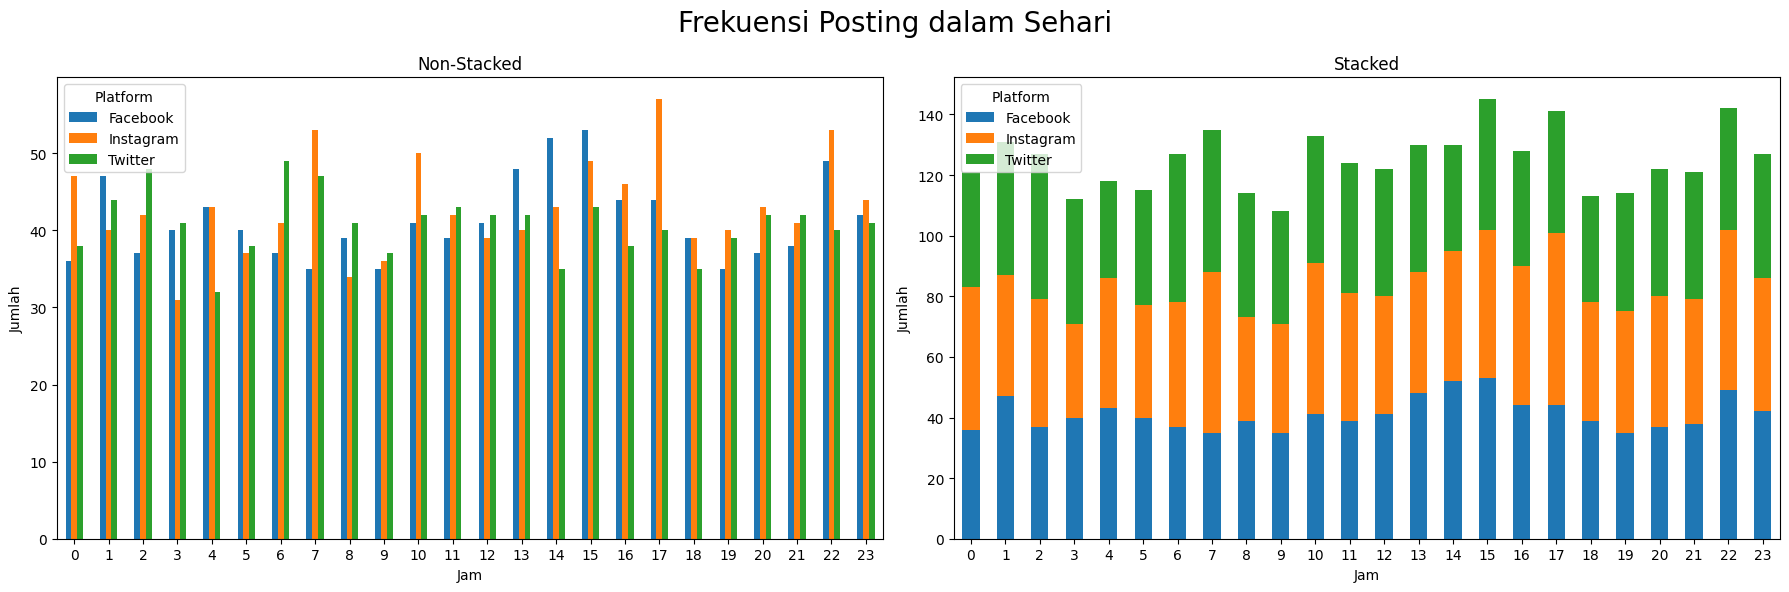

In [15]:
grouped = c.groupby(['Hour', 'platform'])['User'].sum().reset_index()

pivot_df = grouped.pivot_table(index='Hour', columns='platform', values='User', fill_value=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

grafik_2('Non-Stacked', ax1, False, 'Jam', 'Jumlah', pivot_df.index)

grafik_2('Stacked', ax2, True, 'Jam', 'Jumlah', pivot_df.index)

plt.suptitle('Frekuensi Posting dalam Sehari', fontsize=20)
plt.tight_layout()
plt.show()

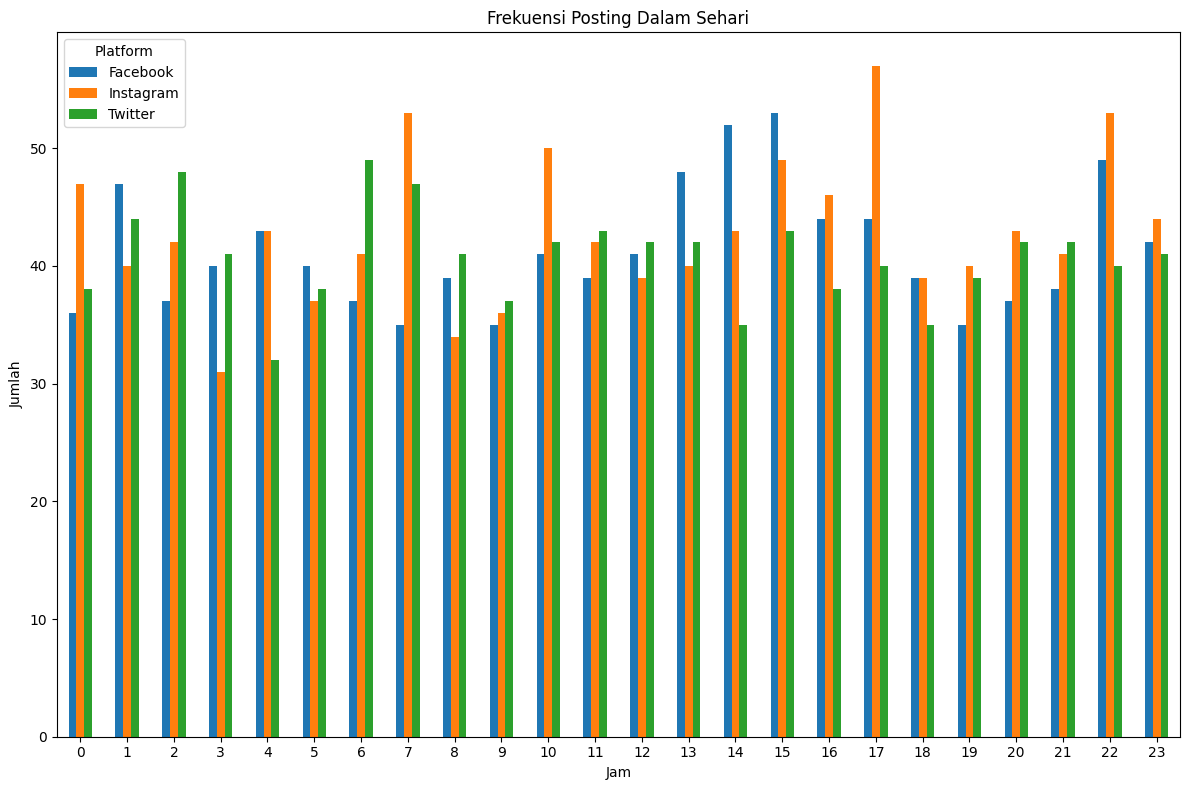

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

grouped = c.groupby(['Hour', 'platform'])['User'].sum().reset_index()

pivot_df = grouped.pivot_table(index='Hour', columns='platform', values='User', fill_value=0)
pivot_df.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.title('Frekuensi Posting Dalam Sehari')

plt.tight_layout()
plt.show()

In [17]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in c.iloc[:, 1:6]])

c_t4 = query(f'''SELECT FLOOR(Hour / 4) * 4 AS Hour_4, {sum_col}, platform FROM c
        GROUP BY platform, Hour_4
        ORDER BY Hour_4''')
c_t4['Hour_4'] = c_t4['Hour_4'].astype(int)
#c_t4.to_csv('c_t4.csv', index=False)
c_t4

,Hour_4,likes,comments,shares,User,Content,platform
0,0,27859.0,4260.0,2744.0,171.0,171.0,Twitter
1,0,23486.0,4372.0,2593.0,160.0,160.0,Instagram
2,0,25060.0,4064.0,2495.0,160.0,160.0,Facebook
3,4,27466.0,4438.0,2603.0,174.0,174.0,Instagram
4,4,26291.0,3911.0,2507.0,155.0,155.0,Facebook
5,4,26863.0,4230.0,2668.0,166.0,166.0,Twitter
6,8,25653.0,4095.0,2578.0,163.0,163.0,Twitter
7,8,23969.0,4083.0,2170.0,154.0,154.0,Facebook
8,8,22861.0,4109.0,2487.0,162.0,162.0,Instagram
9,12,26673.0,3786.0,2417.0,162.0,162.0,Twitter


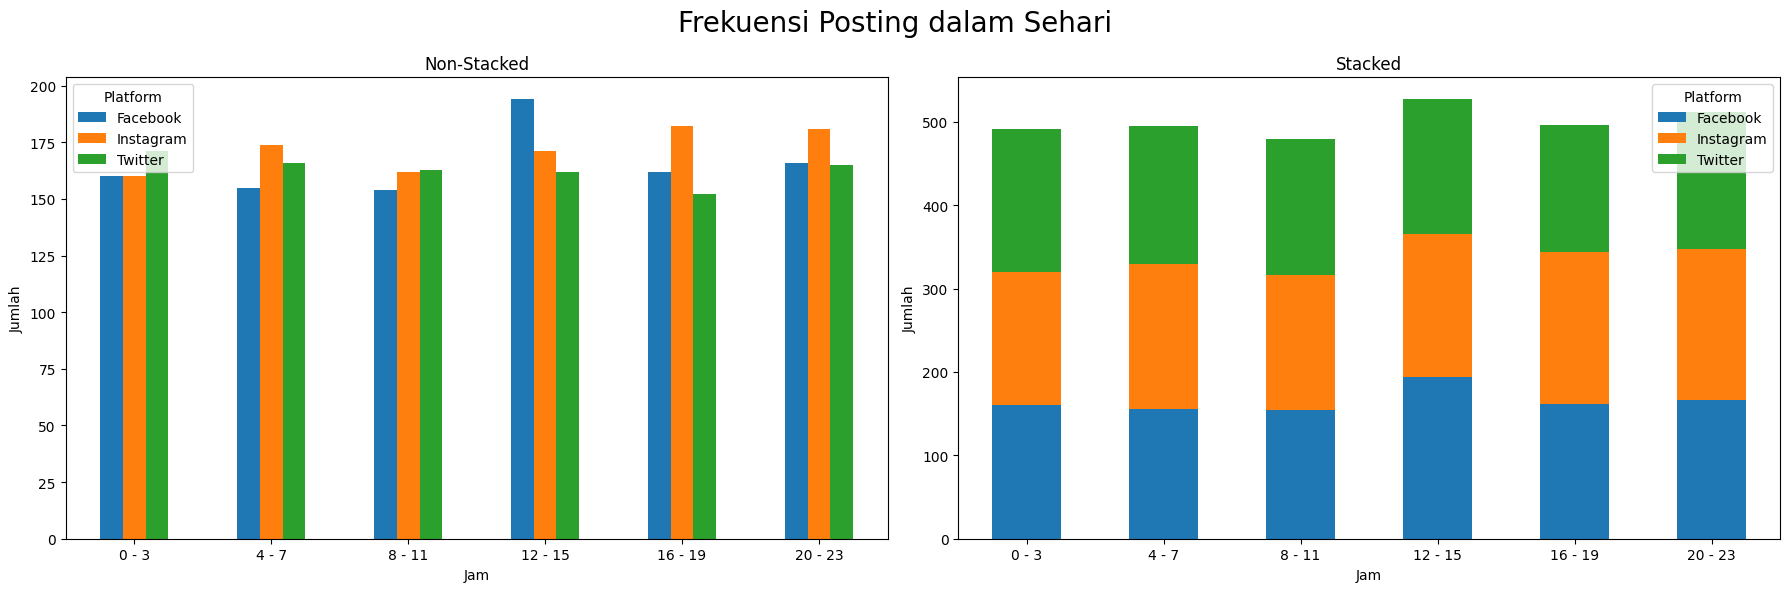

In [18]:
grouped = c_t4.groupby(['Hour_4', 'platform'])['User'].sum().reset_index()

pivot_df = grouped.pivot_table(index='Hour_4', columns='platform', values='User', fill_value=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

grafik_2('Non-Stacked', ax1, False, 'Jam', 'Jumlah', [f'{i} - {i+3}' for i in range(0, 24, 4)])

grafik_2('Stacked', ax2, True, 'Jam', 'Jumlah', [f'{i} - {i+3}' for i in range(0, 24, 4)])

plt.suptitle('Frekuensi Posting dalam Sehari', fontsize=20)
plt.tight_layout()
plt.show()

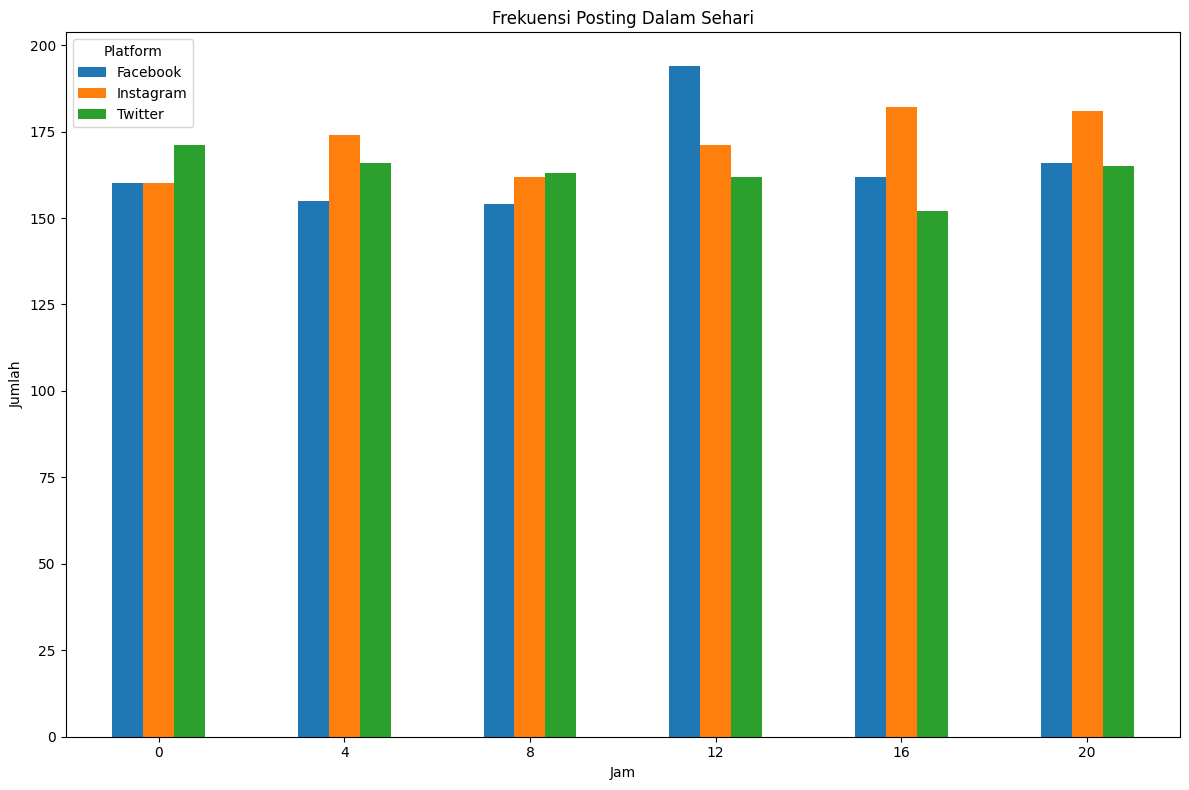

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

grouped = c_t4.groupby(['Hour_4', 'platform'])['User'].sum().reset_index()

pivot_df = grouped.pivot_table(index='Hour_4', columns='platform', values='User', fill_value=0)
pivot_df.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.title('Frekuensi Posting Dalam Sehari')

plt.tight_layout()
plt.show()

In [20]:
app = Dash(__name__)

buffer = io.StringIO()

app.layout = html.Div([
    html.H2('Perkembangan Interaksi Platform', style={'color': 'khaki'}),
    dcc.Dropdown(
        id='platform-dropdown',
        options=[{'label': platform, 'value': platform} for platform in c_t4['platform'].unique()],
        value=sorted(c_t4['platform'].unique())[0],
        clearable=False        
    ),
    dcc.Graph(id='platform-graph')
])

@app.callback(
    Output('platform-graph', 'figure'),
    [Input('platform-dropdown', 'value')]
)
def update_graph(selected_platform):
    filtered_df = c_t4[c_t4['platform'] == selected_platform]
    fig = px.bar(filtered_df, x=[f'{i} - {i+3}' for i in range(0, 24, 4)], y=['likes', 'comments', 'shares'], barmode='group',
                 labels={'x': 'Jam', 'variable': 'Category', 'value': 'Jumlah'}, title=f'Statistik {selected_platform}')
    fig.update_layout(xaxis_title='Jam', yaxis_title='Jumlah', legend_title='Category')
    
    fig.write_html("g_6.html")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True,  port=4)
    #app.to_html('dashboard.html')

Rata-Rata Aktivitas (likes, comments, dan share) disetiap Postingan

In [21]:
data['avg_count'] = data[['likes', 'comments', 'shares']].mean(axis=1).round(2)
data

,id,platform,username,post_date,content,likes,comments,shares,avg_count
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,15.33
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,70.00
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,114.00
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,25.33
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,9.00
...,...,...,...,...,...,...,...,...,...
2995,2996,Twitter,walkerthomas,2023-10-31 05:45:03,Argue fall from degree.,82,38,20,46.67
2996,2997,Facebook,shieldsnicholas,2023-09-01 23:45:03,Bank effort return glass number foot.,245,14,19,92.67
2997,2998,Twitter,christinasaunders,2023-09-04 00:45:03,Lead a with physical south arm crime.,146,38,23,69.00
2998,2999,Instagram,destinyharris,2023-11-08 19:45:03,Consumer especially support decision quality c...,150,6,5,53.67


In [22]:
#cek duplikat user
data[['platform', 'username']].value_counts()

platform   username      
Twitter    johnsonmichael    3
Facebook   qwhite            2
Twitter    williamsdaniel    2
Facebook   smithkenneth      2
           aboyd             2
                            ..
Instagram  ahoward           1
           akemp             1
           alan15            1
           alancollins       1
Twitter    ztaylor           1
Name: count, Length: 2984, dtype: int64

In [23]:
#berdasarkan user (yang melakukan post >1)
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in data.iloc[:, 5:9]])

d = query(f'''SELECT username, platform, COUNT(content) AS Content,
            {sum_col} FROM data 
            GROUP BY username, platform
            ORDER BY Content DESC''')
d   

,username,platform,Content,likes,comments,shares,avg_count
0,johnsonmichael,Twitter,3,466.0,35.0,59.0,186.66
1,james79,Instagram,2,278.0,59.0,29.0,122.00
2,aboyd,Facebook,2,101.0,33.0,27.0,53.67
3,michael62,Twitter,2,322.0,57.0,30.0,136.33
4,williamsdaniel,Twitter,2,294.0,96.0,41.0,143.67
...,...,...,...,...,...,...,...
2979,turnerjessica,Instagram,1,152.0,1.0,18.0,57.00
2980,jsanders,Facebook,1,190.0,23.0,20.0,77.67
2981,wilkinspamela,Instagram,1,13.0,23.0,26.0,20.67
2982,karinabender,Instagram,1,172.0,44.0,5.0,73.67


Korelasi Panjang Teks Postingan dan Jumlah Interaksi

In [24]:
data['len_content'] = data['content'].apply(len)
data.head()

,id,platform,username,post_date,content,likes,comments,shares,avg_count,len_content
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,15.33,28
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,70.00,38
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,114.00,47
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,25.33,41
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,9.00,45


In [25]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in data.iloc[:, 5:8]])

e = query(f'''SELECT platform, len_content, {sum_col} FROM data 
            GROUP BY platform, len_content
            ORDER BY len_content''')
e

,platform,len_content,likes,comments,shares
0,Facebook,10,144.0,48.0,17.0
1,Facebook,12,23.0,25.0,16.0
2,Instagram,13,137.0,10.0,12.0
3,Facebook,13,187.0,28.0,2.0
4,Twitter,13,188.0,43.0,18.0
...,...,...,...,...,...
156,Twitter,66,39.0,22.0,11.0
157,Twitter,67,174.0,9.0,7.0
158,Instagram,67,201.0,11.0,16.0
159,Facebook,69,111.0,16.0,11.0


In [26]:
grouped = e.groupby(['len_content', 'platform'])[['likes', 'comments', 'shares']].sum().reset_index()
grouped['total'] = grouped[['likes', 'comments', 'shares']].sum(axis=1)

fig = px.bar(
    grouped, 
    x='len_content', 
    y=['likes', 'comments', 'shares'], 
    color='platform',
    hover_name='total',
    title='Korelasi Panjang Teks Postingan dengan Jumlah Interaksi',
    barmode='group')

fig.update_traces(
    customdata=['Likes'] * 55 + ['Comments'] * 55 + ['Shares'] * 55,
    hovertemplate="<br><b>Platform:</b> %{fullData.name}"
                  "<br><b>Panjang Teks:</b> %{x}"
                  "<br><b>Total Interaksi:</b> %{hovertext}"
                  "<br><b>Type:</b> %{customdata}"
                  "<br><b>Count:</b> %{y}")

fig.update_layout(
    xaxis_title='Panjang Teks',
    yaxis_title='Jumlah',
    legend_title='Platform')
fig.write_html("g_7.html")
fig.show()

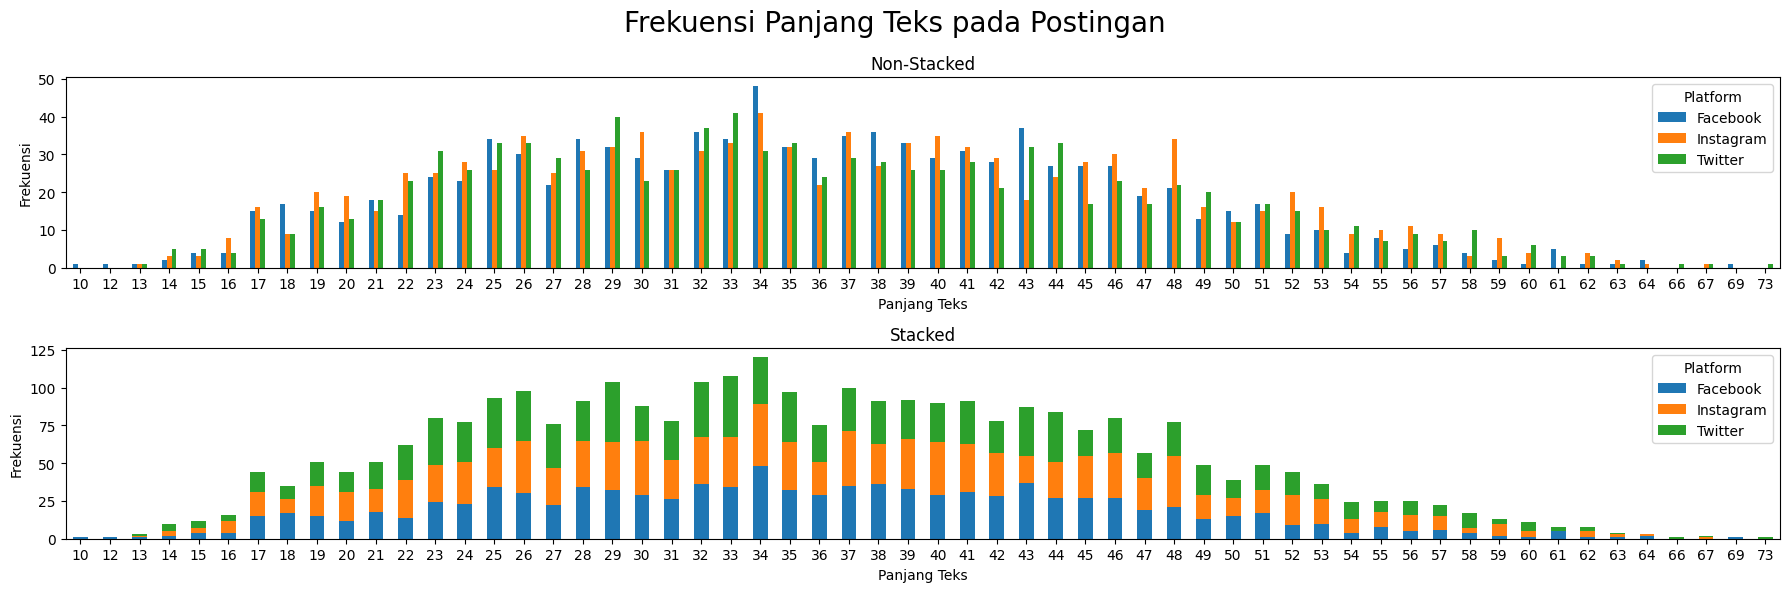

In [27]:
#untuk mengetahui jumlah postingan yang dilakukan berdasarkan panjang teks
grouped = data[['platform', 'len_content']].value_counts().reset_index(name='frequency')

pivot_df = grouped.pivot_table(index='len_content', columns='platform', values='frequency', fill_value=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))

grafik_2('Non-Stacked', ax1, False, 'Panjang Teks', 'Frekuensi', pivot_df.index)

grafik_2('Stacked', ax2, True, 'Panjang Teks', 'Frekuensi', pivot_df.index)

plt.suptitle('Frekuensi Panjang Teks pada Postingan', fontsize=20)
plt.tight_layout()
plt.show()

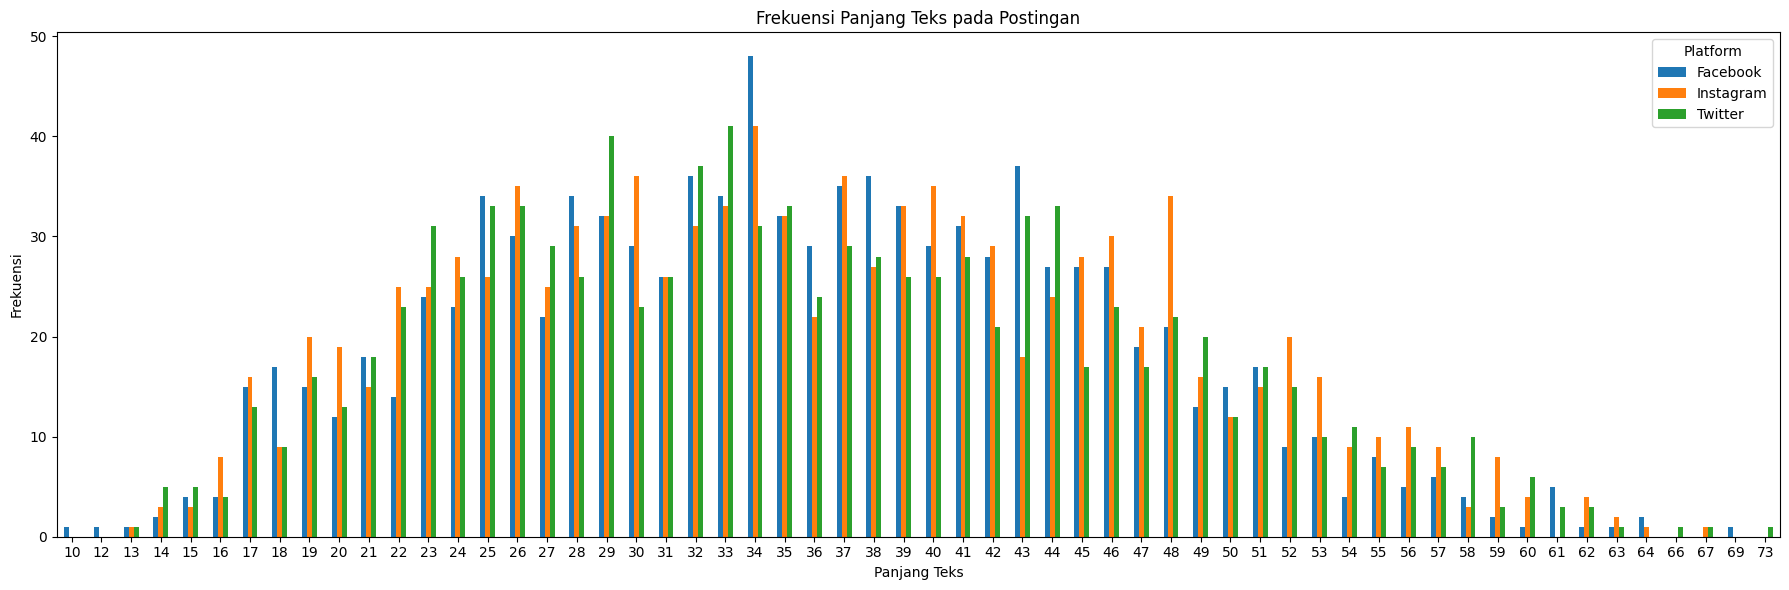

In [28]:
fig, ax = plt.subplots(figsize=(18, 6))

grouped = data[['platform', 'len_content']].value_counts().reset_index(name='frequency')

pivot_df = grouped.pivot_table(index='len_content', columns='platform', values='frequency', fill_value=0)
pivot_df.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.title('Frekuensi Panjang Teks pada Postingan')

plt.tight_layout()
plt.show()

User dengan Aktivitas Tertinggi -> untuk mengetahui user yang memiliki pengaruh dalam jaringan sosial

In [29]:
data['total'] = data[['likes', 'comments', 'shares']].sum(axis=1)
data.sort_values(by='total', ascending=False)

,id,platform,username,post_date,content,likes,comments,shares,avg_count,len_content,total
2683,2684,Instagram,kelly31,2023-05-06 15:45:03,Produce institution list degree.,296,45,30,123.67,32,371
2939,2940,Instagram,carl60,2023-11-13 16:45:03,Indeed national near forward.,299,50,22,123.67,29,371
2555,2556,Facebook,randymeyers,2022-12-14 18:45:03,Next short history forward suggest gas.,299,44,27,123.33,39,370
2486,2487,Twitter,josephmaxwell,2023-04-21 07:45:03,Break get look lead.,290,48,30,122.67,20,368
1317,1318,Instagram,bbell,2023-11-02 12:45:03,Thousand wide matter.,299,42,25,122.00,21,366
...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,Twitter,fnorris,2023-04-15 22:45:03,No animal after travel sea theory.,10,10,7,9.00,34,27
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,9.00,45,27
1347,1348,Instagram,erikabrown,2023-03-15 15:45:03,Compare hotel partner difficult.,12,9,5,8.67,32,26
2181,2182,Instagram,millerheather,2023-02-07 15:45:03,Think contain risk daughter from least.,10,8,4,7.33,39,22


In [30]:
#user yang melakukan post >1
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in data.iloc[:, 5:]])

f = query(f'''SELECT platform, username, COUNT(username) AS user_count, {sum_col} FROM data 
      GROUP BY username, platform ORDER BY total DESC''')
f

,platform,username,user_count,likes,comments,shares,avg_count,len_content,total
0,Instagram,jenniferbrown,2,546.0,74.0,28.0,216.00,74.0,648.0
1,Facebook,qwhite,2,482.0,75.0,6.0,187.67,61.0,563.0
2,Twitter,johnsonmichael,3,466.0,35.0,59.0,186.66,107.0,560.0
3,Twitter,brewersarah,2,394.0,58.0,29.0,160.33,59.0,481.0
4,Facebook,kingjose,2,349.0,62.0,37.0,149.33,81.0,448.0
...,...,...,...,...,...,...,...,...,...
2979,Instagram,smithmeghan,1,12.0,6.0,9.0,9.00,45.0,27.0
2980,Twitter,fnorris,1,10.0,10.0,7.0,9.00,34.0,27.0
2981,Instagram,erikabrown,1,12.0,9.0,5.0,8.67,32.0,26.0
2982,Instagram,millerheather,1,10.0,8.0,4.0,7.33,39.0,22.0


In [31]:
#value tertinggi setiap platform
def high_platform(tipe:str):
    return query(f'''SELECT d1.*
                    FROM f d1
                    JOIN (
                        SELECT platform, MAX({tipe}) as max_total
                        FROM f
                        GROUP BY platform
                    ) d2 ON d1.platform = d2.platform AND d1.{tipe} = d2.max_total
                    ORDER BY {tipe} DESC''')

In [32]:
#value tertinggi
def high_just(tipe:str):
    return query(f"""SELECT * FROM f 
                WHERE {tipe} = (
                    SELECT MAX({tipe}) FROM f                    
                ) ORDER BY total DESC""")

In [33]:
#total tertinggi
h_total = high_platform('total')
h_total

,platform,username,user_count,likes,comments,shares,avg_count,len_content,total
0,Instagram,jenniferbrown,2,546.0,74.0,28.0,216.00,74.0,648.0
1,Facebook,qwhite,2,482.0,75.0,6.0,187.67,61.0,563.0
2,Twitter,johnsonmichael,3,466.0,35.0,59.0,186.66,107.0,560.0


In [34]:
#likes tertinggi
h_likes = high_just('likes')
h_likes

,platform,username,user_count,likes,comments,shares,avg_count,len_content,total
0,Instagram,jenniferbrown,2,546.0,74.0,28.0,216.0,74.0,648.0


In [35]:
#likes comments
h_comments = high_just('comments')
h_comments

,platform,username,user_count,likes,comments,shares,avg_count,len_content,total
0,Twitter,williamsdaniel,2,294.0,96.0,41.0,143.67,67.0,431.0


In [36]:
#likes shares
h_shares = high_just('shares')
h_shares

,platform,username,user_count,likes,comments,shares,avg_count,len_content,total
0,Twitter,johnsonmichael,3,466.0,35.0,59.0,186.66,107.0,560.0


In [37]:
#user yang memiliki total aktivitas tertinggi dengan likes/comments/share tertinggi
query('''SELECT h_total.* FROM h_total
        JOIN h_likes ON h_total.total = h_likes.total AND h_total.platform = h_likes.platform AND h_total.username = h_likes.username
        UNION
        SELECT h_total.* FROM h_total
        JOIN h_comments ON h_total.total = h_comments.total AND h_total.platform = h_comments.platform AND h_total.username = h_comments.username
        UNION
        SELECT h_total.* FROM h_total
        JOIN h_shares ON h_total.total = h_shares.total AND h_total.platform = h_shares.platform AND h_total.username = h_shares.username
        ORDER BY h_total.total DESC''')

,platform,username,user_count,likes,comments,shares,avg_count,len_content,total
0,Instagram,jenniferbrown,2,546.0,74.0,28.0,216.00,74.0,648.0
1,Twitter,johnsonmichael,3,466.0,35.0,59.0,186.66,107.0,560.0
